# Motor Estimation Using Heterogeneus Sets of Objects in Conformal Geometric Algebra

## Lars Tingelstad, IPK, NTNU

### GACSE Workshop @ CGI 2016

In [1]:
from __future__ import print_function

In [2]:
import sys
sys.path.append('../build/')

In [3]:
%pylab inline
np.set_printoptions(precision=4, suppress=True)


Populating the interactive namespace from numpy and matplotlib


In [4]:
import versor as vsr
from versor.drawing import *

In [5]:
from motor_estimation import MotorEstimationSolver
from motor_estimation_valkenburg_dorst import (point_matrix, dual_line_matrix, dual_plane_matrix)

In [6]:
from game import (MotorEstimationSolver, VDMotorEstimationSolver)

## Ground truth motor

In [7]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
print(motor)

Mot: [ 0.87 0 -0.5 0 -0.68 -0.43 -0.18 -0.25 ]


In [8]:
vsr.Tnv(vsr.Vec(1,2,3))

TypeError: Incompatible function arguments. The following argument types are supported:
    1. (Tnv, Vec) -> None


In [9]:
pnt = vsr.CGA(vsr.Vec(1,2,3).null())
print(pnt)

CGA: [ 0 1 2 3 1 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]


In [10]:
mot = vsr.CGA(motor)
print(mot)

CGA: [ 0.87 0 0 0 0 0 0 -0.5 0 0 0 0 -0.68 -0.43 -0.18 0 0 0 0 0 0 0 0 0 0 0 0 -0.25 0 0 0 0 ]


In [11]:
pnt * mot.rev()

CGA: [ 0 0.049 2.2 3.3 0.87 8.2 0 0 0 0 0 0 0 0 0 0 -1.2 0 0.5 0 -1.7 2.1 -1.2 -0.68 -0.43 -0.18 0 0 0 0 0 0.25 ]

In [12]:
vsr.CGA(vsr.Mot(mot * pnt))

TypeError: Incompatible function arguments. The following argument types are supported:
    1. (Mot, float, float, float, float, float, float, float, float) -> None


In [13]:
a = vsr.Vec(1,2,3)
R  = vsr.Rot(vsr.Biv(1,1,1) * np.pi/6.0)
vsr.CGA(a) * vsr.CGA(R)

CGA: [ 0 2.9 2.1 0.48 0 0 0 0 0 0 0 0 0 0 0 0 -0.91 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]

In [14]:
vsr.CGA(R)

CGA: [ 0.62 0 0 0 0 0 -0.45 -0.45 -0.45 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]

In [15]:
vsr.CGA(R).rev() * vsr.CGA(a) 

CGA: [ 0 2.9 2.1 0.48 0 0 0 0 0 0 0 0 0 0 0 0 0.91 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]

In [16]:
import motor_jacobian

In [17]:
a = vsr.Vec(1,2,3)
R  = vsr.Rot(vsr.Biv(1,0,0) * np.pi/6.0)
_, J = motor_jacobian.diff_rotor_cost(R, a, vsr.Vec(1,3,4))
print(J)

[[-0.2679  4.4641  5.1962 -3.    ]
 [ 4.4641  0.2679  3.      5.1962]
 [ 5.1962 -3.      0.2679 -4.4641]]


In [18]:
ae = vsr.EGA(a)
Re = vsr.EGA(R)
one = vsr.EGA(1,0,0,0,0,0,0,0)

In [19]:
vsr.EGA(0,1,0,0,0,0,0,0) * ae * Re.rev()

EGA: [ -0.13 0 0 0 2.2 2.6 1.5 0 ]

In [20]:
Re * ae

EGA: [ 0 -0.13 2.2 2.6 0 0 0 -1.5 ]

In [21]:
vsr.EGA(0,0,0,0,1.,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,0,0,-1.,0,0,0)

EGA: [ 0 4.5 0.27 -3 0 0 0 0 ]

In [22]:
Jac0 = np.zeros((3,4))
Jac0[0,1:] = np.array(vsr.EGA(0,1,0,0,0,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,1,0,0,0,0,0,0))[4:7]
Jac0[0,0] = np.array(vsr.EGA(0,1,0,0,0,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,1,0,0,0,0,0,0))[0]

# Jac0[0,:] = np.array(vsr.EGA(0,0,1,0,0,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,1,0,0,0,0,0))[1:4]
# Jac0[0,:] = np.array(vsr.EGA(0,0,0,1,0,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,0,1,0,0,0,0))[1:4]
print(Jac0)

[[-0.2679  0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]]


In [23]:
np.array(vsr.EGA(0,1,0,0,0,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,-1,0,0,0,0,0,0))

array([ 0.    ,  0.    ,  0.    ,  0.    ,  4.4641,  5.1962,  3.    ,  0.    ])

In [24]:
dll = vsr.Dll(vsr.Vec(4,5,6).null(), vsr.Vec(1,2,3).null())
vsr.Mot(1,0,0,0,0,0,0,0) * dll * motor + motor * dll * vsr.Mot(1,0,0,0,0,0,0,0).rev()
vsr.Mot(0,1,0,0,0,0,0,0) * dll * motor + motor * dll * vsr.Mot(0,1,0,0,0,0,0,0).rev()

Mot: [ -3 0 -5.2 -5.2 -12 -3.7 1.1e-16 -1.5 ]

In [25]:
dll1 = vsr.Dll(vsr.Vec(4,5,6).null(), vsr.Vec(1,2,3).null())
dll2 = vsr.Dll(vsr.Vec(-4,5,-6).null(), vsr.Vec(2,2,3).null())
print(motor_jacobian.diff_cost_lines(motor, dll1, dll2))

[[-8.1962 -3.      2.1962  5.1962  0.      0.      0.      0.    ]
 [ 5.1962 -2.1962 -3.      8.1962  0.      0.      0.      0.    ]
 [-2.1962 -5.1962 -8.1962 -3.      0.      0.      0.      0.    ]
 [-0.8038 -8.8923  5.1962  1.7942 -3.      8.1962 -5.1962  2.1962]
 [-8.8923  0.8038 -1.7942  5.1962 -8.1962 -3.      2.1962  5.1962]
 [ 5.1962  1.7942  0.8038  8.8923  5.1962 -2.1962 -3.      8.1962]]


In [26]:
Jadcomm = motor_jacobian.diff_cost_lines_comm(motor, dll1, dll2)
print(Jadcomm)

[[ -37.7654   -2.4115   -6.5885  -58.1769    0.        0.        0.        0.    ]
 [ -29.4115   28.7654   86.9423   58.1769    0.        0.        0.        0.    ]
 [  71.3538  -10.7654  -33.5885   58.1769    0.        0.        0.        0.    ]
 [ -29.0885   26.9134   67.7365 -220.973    58.1769   33.5885  -10.7654
   -71.3538]
 [ 222.4153   83.7346  130.1769 -123.5019  -58.1769   86.9423  -28.7654
   -29.4115]
 [-196.0615   37.4423   85.8231 -184.7365  -58.1769    6.5885   -2.4115
    37.7654]]


In [27]:
JacLines = np.zeros((6,8))
for i in range(8):
    ei = vsr.Mot(0,0,0,0,0,0,0,0)
    ei[i] = 1.
    JacLines[:,i] = np.array(motor * dll * ei.rev() + ei * dll * motor.rev())[1:7]
print(JacLines)

[[-8.1962 -3.      2.1962  5.1962  0.      0.      0.      0.    ]
 [ 5.1962 -2.1962 -3.      8.1962  0.      0.      0.      0.    ]
 [-2.1962 -5.1962 -8.1962 -3.      0.      0.      0.      0.    ]
 [-0.8038 -8.8923  5.1962  1.7942 -3.      8.1962 -5.1962  2.1962]
 [-8.8923  0.8038 -1.7942  5.1962 -8.1962 -3.      2.1962  5.1962]
 [ 5.1962  1.7942  0.8038  8.8923  5.1962 -2.1962 -3.      8.1962]]


In [28]:
dll * dll

Mot: [ -27 0 0 0 0 0 0 0 ]

In [29]:
Jac = np.zeros((3,4))
Jac[:,0] = np.array(vsr.EGA(1,0,0,0,0,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(1,0,0,0,0,0,0,0))[1:4]
Jac[:,1] = np.array(vsr.EGA(0,0,0,0,1,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,0,0,-1.,0,0,0))[1:4]
Jac[:,2] = np.array(vsr.EGA(0,0,0,0,0,1,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,0,0,0,-1,0,0))[1:4]
Jac[:,3] = np.array(vsr.EGA(0,0,0,0,0,0,1.,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,0,0,0,0,-1,0))[1:4]
print(Jac)

[[-0.2679  4.4641  5.1962 -3.    ]
 [ 4.4641  0.2679  3.      5.1962]
 [ 5.1962 -3.      0.2679 -4.4641]]


In [30]:
print(Jac)

[[-0.2679  4.4641  5.1962 -3.    ]
 [ 4.4641  0.2679  3.      5.1962]
 [ 5.1962 -3.      0.2679 -4.4641]]


In [31]:
print(motor_jacobian.diff_point(motor, vsr.Vec(1,0,0).null()))

[[  3.0981e+000  -2.0000e+000   1.0000e+000   0.0000e+000  -1.7321e+000
   -2.0000e+000  -3.0981e+000   0.0000e+000]
 [  1.0000e+000   0.0000e+000   1.0000e+000   0.0000e+000  -3.0981e+000
    2.0000e+000  -1.0000e+000   1.7321e+000]
 [  0.0000e+000  -1.0000e+000   0.0000e+000   0.0000e+000   2.2321e+000
    2.0000e+000  -5.0000e-001   0.0000e+000]
 [ -4.4641e+000   3.5907e-052   5.9728e+015   4.2649e-096   9.0837e+223
    7.2941e-043   2.5833e-057   8.2605e-067]
 [  7.2941e-043   2.5833e-057   8.2605e-067   5.1229e+015   1.4153e+161
    9.1665e-072   4.5258e+097   4.9170e-062]]


In [32]:
motor_jacobian.diff_cost(motor, vsr.Vec(1,0,0).null(), vsr.Vec(0,0,0).null())

array([[ 3.0981,  0.866 ,  1.366 ,  0.5   , -1.7321,  0.    ,  1.    ,  0.    ],
       [ 0.866 , -3.0981, -0.5   ,  1.366 ,  0.    , -1.7321,  0.    , -1.    ],
       [ 1.366 ,  0.5   , -3.0981, -0.866 , -1.    ,  0.    , -1.7321,  0.    ]])

In [33]:
me = vsr.CGA(motor)
pe = vsr.CGA(vsr.Vec(1,0,0).null())

In [34]:
Jac2 = np.zeros((5,8))
Jac2[:,0] = np.array(vsr.CGA(vsr.Mot(1,0,0,0,0,0,0,0)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(1,0,0,0,0,0,0,0)))[1:6]
Jac2[:,1] = np.array(vsr.CGA(vsr.Mot(0,1,0,0,0,0,0,0)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(0,-1,0,0,0,0,0,0)))[1:6]
Jac2[:,2] = np.array(vsr.CGA(vsr.Mot(0,0,1,0,0,0,0,0)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(0,0,-1,0,0,0,0,0)))[1:6]
Jac2[:,3] = np.array(vsr.CGA(vsr.Mot(0,0,0,1,0,0,0,0)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(0,0,0,-1,0,0,0,0)))[1:6]
Jac2[:,4] = np.array(vsr.CGA(vsr.Mot(0,0,0,0,1,0,0,0)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(0,0,0,0,-1,0,0,0)))[1:6]
Jac2[:,5] = np.array(vsr.CGA(vsr.Mot(0,0,0,0,0,1,0,0)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(0,0,0,0,0,-1,0,0)))[1:6]
Jac2[:,6] = np.array(vsr.CGA(vsr.Mot(0,0,0,0,0,0,1,0)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(0,0,0,0,0,0,-1,0)))[1:6]
Jac2[:,7] = np.array(vsr.CGA(vsr.Mot(0,0,0,0,0,0,0,1)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(0,0,0,0,0,0,0,1)))[1:6]
print(Jac2)

[[ 3.0981  0.866   1.366   0.5    -1.7321  0.      1.      0.    ]
 [ 0.866  -3.0981 -0.5     1.366   0.     -1.7321  0.     -1.    ]
 [ 1.366   0.5    -3.0981 -0.866  -1.      0.     -1.7321  0.    ]
 [ 1.7321  0.     -1.      0.      0.      0.      0.      0.    ]
 [ 2.2321 -0.866  -0.866   0.5    -4.4641 -1.7321 -1.7321 -1.    ]]


In [35]:
vsr.Mot(0,1,0,0,0,0,0,0).rev() * (vsr.Mot(0,1,0,0,0,0,0,0) * vsr.Mot(*Jac2[0,:]))[0]

Mot: [ -0 0.87 0 0 0 0 0 -0 ]

In [36]:
vsr.Mot(0,0,0,0,0,0,0,1).rev()

Mot: [ 0 -0 -0 -0 -0 -0 -0 1 ]

In [37]:
pe * me.rev()

CGA: [ 0 1.5 0.43 0.68 0.87 1.1 0 0 0 0 0 0 0 0 0 0 -0.25 0 0.5 0 0.43 0.43 -0.25 -0.68 -0.43 -0.18 0 0 0 0 0 0.25 ]

In [121]:
a = vsr.Vec(1,2,3)
R = vsr.Rot(vsr.Biv(1,1,1).unit() * np.pi/6.0)
B = vsr.Biv(1,2,3).unit()
ae = vsr.EGA(a)
Re = vsr.EGA(R)
Be = vsr.EGA(B)

In [110]:
B = (ae * Re.rev() * vsr.EGA(0,0,1,0,0,0,0,0)) + (ae.rev() * Re.rev() * vsr.EGA(0,0,1,0,0,0,0,0).rev())
print(B)
vsr.Rot(B[0], 
        (e12.rev() * (e12 * B)[0])[4], 
        (e13.rev() * (e13 * B)[0])[5],
        (e23.rev() * (e23 * B)[0])[6])

EGA: [ 2.3 0 0 0 -1.2 -1.2 -6.9 0 ]


Rot: [ 2.3 -1.2 -1.2 -6.9 ]

In [111]:
xe = vsr.EGA(0,1,1,1,0,0,0,0)
ae = vsr.EGA(0,1,2,3,0,0,0,0)

In [112]:
(ae * xe * xe) + xe * ae * xe

EGA: [ 0 12 12 12 0 0 0 0 ]

In [113]:
_, J = motor_jacobian.diff_rotor_cost(R, a, vsr.Vec(1,11,4))
print(J)

[[-1.1547  2.3094  6.9282 -1.1547]
 [ 2.3094  1.1547  1.1547  6.9282]
 [ 6.9282 -1.1547  1.1547 -2.3094]]


In [114]:
f0 = ae * Re.rev() + Re * ae

In [123]:
(ae * Re.rev() + Re * ae) +\
e12.rev() * ( e12 * ae * Re.rev() + Re * ae * e12.rev()) +\
e13.rev() * ( e13 * ae * Re.rev() + Re * ae * e13.rev()) +\
e23.rev() * ( e23 * ae * Re.rev() + Re * ae * e23.rev()) 

EGA: [ 0 -3.5 6.9 21 0 0 0 3.5 ]

In [ ]:
e12.rev() *( e12 * ae * Re.rev() ) + e12.rev() * Re * ae * e12.rev()

In [122]:
Be.rev() * (Be * ae * Re.rev() + Re * ae * Be.rev())

EGA: [ 0 -0.91 2.1 7 0 0 0 1.2 ]

In [85]:
f2 = e13.rev() *( e13 * ae * Re.rev() ) + e13.rev() * Re * ae * e13.rev()

In [86]:
f3 = e23.rev() *( e23 * ae * Re.rev() ) + e23.rev() * Re * ae * e23.rev()

In [87]:
f0 + f1 + f2 + f3

EGA: [ 0 5.2 1.4 22 0 0 0 3 ]

In [127]:
( e12 * ae * Re.rev() + Re * ae * e12.rev())

EGA: [ 0 2.3 1.2 -1.2 0 0 0 -4.4e-16 ]

In [124]:
Jac = np.zeros((3,4))
Jac[:,0] = np.array(vsr.EGA(1,0,0,0,0,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(1,0,0,0,0,0,0,0))[1:4]
Jac[:,1] = np.array(vsr.EGA(0,0,0,0,1,0,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,0,0,-1.,0,0,0))[1:4]
Jac[:,2] = np.array(vsr.EGA(0,0,0,0,0,1,0,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,0,0,0,-1,0,0))[1:4]
Jac[:,3] = np.array(vsr.EGA(0,0,0,0,0,0,1.,0) * ae * Re.rev() + Re * ae * vsr.EGA(0,0,0,0,0,0,-1,0))[1:4]
print(Jac)

[[-1.1547  2.3094  6.9282 -1.1547]
 [ 2.3094  1.1547  1.1547  6.9282]
 [ 6.9282 -1.1547  1.1547 -2.3094]]


In [60]:
ei = vsr.EGA(0,0,0,0,0,0,1,0) 
((Re * ae * ei.rev() + ei * ae * Re.rev()) <= vsr.EGA(0,0,1,0,0,0,0,0) ) 

EGA: [ 7.2 0 0 0 0 0 0 0 ]

In [61]:
vsr.CGA(vsr.Mot(0,1,0,0,0,0,0,0)) * pe * me.rev()

CGA: [ 0 0.43 -1.5 0.25 0 -0.43 0 0 0 0 0 0 0 0 0 0 0.68 0.87 0 -0.5 1.1 -0.25 -0.43 -0.43 0.68 -0.25 0 0 0 0 0 -0.18 ]

In [62]:
vsr.Mot(me * pe)

TypeError: Incompatible function arguments. The following argument types are supported:
    1. (Mot, float, float, float, float, float, float, float, float) -> None


In [63]:
vd = VDMotorEstimationSolver()

In [64]:
Jac3 = np.zeros((8,6))
Jac3[:,0] = vsr.Dll(1,0,0,0,0,0) * motor
Jac3[:,1] = vsr.Dll(0,1,0,0,0,0) * motor
Jac3[:,2] = vsr.Dll(0,0,1,0,0,0) * motor
Jac3[:,3] = vsr.Dll(0,0,0,1,0,0) * motor
Jac3[:,4] = vsr.Dll(0,0,0,0,1,0) * motor
Jac3[:,5] = vsr.Dll(0,0,0,0,0,1) * motor
print(Jac3)

[[ 0.     0.5    0.     0.     0.     0.   ]
 [ 0.866  0.    -0.5    0.     0.     0.   ]
 [ 0.     0.866  0.     0.     0.     0.   ]
 [ 0.5    0.     0.866  0.     0.     0.   ]
 [-0.433 -0.183  0.25   0.866  0.     0.5  ]
 [ 0.683 -0.25  -0.183  0.     0.866  0.   ]
 [ 0.25   0.683  0.433 -0.5    0.     0.866]
 [-0.183  0.433 -0.683  0.     0.5    0.   ]]


In [65]:
np.dot(Jac2,Jac3)

array([[ 2.    ,  3.7321,  0.    , -2.    ,  0.    ,  0.    ],
       [-3.    ,  0.    ,  3.7321,  0.    , -2.    ,  0.    ],
       [ 0.    , -3.    , -2.    ,  0.    ,  0.    , -2.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [-0.    , -0.    ,  0.    , -3.    , -2.    , -3.7321]])

In [66]:
np.dot(JacLines,Jac3) 

array([[ 0.    , -2.1962,  6.    ,  0.    ,  0.    ,  0.    ],
       [ 2.1962,  0.    ,  8.1962,  0.    ,  0.    ,  0.    ],
       [-6.    , -8.1962,  0.    ,  0.    ,  0.    ,  0.    ],
       [-1.6077,  0.    , -0.    ,  0.    ,  8.1962, -6.    ],
       [ 4.3923,  0.    ,  0.    , -8.1962,  0.    , -2.1962],
       [-0.    ,  4.3923,  1.6077,  6.    ,  2.1962,  0.    ]])

In [67]:
def printer(**kwargs):
    ega = vsr.EGA(1,0,0,0,0,0,0,0)
    rarr = np.recarray((8), 
                       names=('s','e1', 'e2', 'e3', 'e12', 'e13', 'e23', 'e123'), 
                       buf=np.array(ega))
#     rarr['e12'] = 1
    print(rarr)
    

In [68]:
def full(m):
    return vsr.EGA(m)

In [69]:

B = vsr.EGA(vsr.Rot(1,2,3,4))
X = vsr.EGA(vsr.Biv(1,1,1))

X * B


EGA: [ -9 0 0 0 0 3 0 0 ]

In [70]:
e12 = vsr.EGA(vsr.Biv(1,0,0))
e13 = vsr.EGA(vsr.Biv(0,1,0))
e23 = vsr.EGA(vsr.Biv(0,0,1))

In [71]:
(e12.rev() * (e12 * B)[0] + 
 e13.rev() * (e13 * B)[0] +
 e23.rev() * (e23 * B)[0])

EGA: [ -0 -0 -0 -0 2 3 4 0 ]

In [72]:
e12.rev() * (e12 * ae * Re.rev() + Re * ae * e12.rev()) +\
e13.rev() * (e13 * ae * Re.rev() + Re * ae * e13.rev()) +\
e23.rev() * (e23 * ae * Re.rev() + Re * ae * e23.rev())

EGA: [ 0 3.5 0.93 14 0 0 0 3 ]

In [73]:
np.dot(Jadcomm,Jac3) 

array([[ -31.1769,  -24.5885,  -49.1769,    0.    ,    0.    ,    0.    ],
       [  54.    ,   60.5885,   36.    ,    0.    ,    0.    ,    0.    ],
       [  19.7654,    6.5885,   55.7654,    0.    ,    0.    ,    0.    ],
       [ -79.0615,  -13.1769, -152.3538,   55.7654,   -6.5885,   19.7654],
       [  93.5307,  180.473 , -171.6462,  -36.    ,   60.5885,  -54.    ],
       [ -37.7654,    0.    , -221.2961,  -49.1769,   24.5885,  -31.1769]])

In [74]:
Jac4 = np.zeros((5,6))
Jac4[:,0] = 2. * np.array(vsr.Dll(1,0,0,0,0,0).comm(vsr.Vec(1,0,0).null().spin(motor)))
Jac4[:,1] = 2. * np.array(vsr.Dll(0,1,0,0,0,0).comm(vsr.Vec(1,0,0).null().spin(motor)))
Jac4[:,2] = 2. * np.array(vsr.Dll(0,0,1,0,0,0).comm(vsr.Vec(1,0,0).null().spin(motor)))
Jac4[:,3] = 2. * np.array(vsr.Dll(0,0,0,1,0,0).comm(vsr.Vec(1,0,0).null().spin(motor)))
Jac4[:,4] = 2. * np.array(vsr.Dll(0,0,0,0,1,0).comm(vsr.Vec(1,0,0).null().spin(motor)))
Jac4[:,5] = 2. * np.array(vsr.Dll(0,0,0,0,0,1).comm(vsr.Vec(1,0,0).null().spin(motor)))
print(Jac4)

[[ 2.      3.7321  0.     -2.      0.      0.    ]
 [-3.      0.      3.7321  0.     -2.      0.    ]
 [ 0.     -3.     -2.      0.      0.     -2.    ]
 [ 0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.     -3.     -2.     -3.7321]]


In [75]:
np.array(vsr.CGA(vsr.Mot(0,1,0,0,0,0,0,0)) * pe * me.rev() +  me * pe * vsr.CGA(vsr.Mot(0,-1,0,0,0,0,0,0)))

array([ 0.    ,  0.866 , -3.0981,  0.5   ,  0.    , -0.866 ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    , -0.366 ])

# Figure

In [9]:
pnt = vsr.Vec(0,1,1).null()
dlp = vsr.Dlp(vsr.Vec(1,1,1).unit(), 1)
p1 = vsr.Vec(1,0,1).null()
p2 = vsr.Vec(2,1,1).null()
dll = vsr.Dll(p1,p2).unit()

scene = Scene(children=[
        frame_mesh(),
        point_mesh(pnt,color='palegreen'),
        plane_mesh(dlp, width=1, height=1, color='palegreen'),
        line_mesh(dll, length=100, color='palegreen'),

        point_mesh(pnt.spin(motor),color='lightpink'),
        plane_mesh(dlp.spin(motor), width=1, height=1, color='lightpink'),
        line_mesh(dll.spin(motor), length=100, color='lightpink'),

        AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
# renderer.width = '1024'
# renderer.height = '768'
display(renderer)

In [18]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
# initial_motor = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(0,1,0) * (np.pi/6.0 + np.pi/2.))
mes = MotorEstimationSolver(initial_motor)
mes.add_point_correspondences_residual_block(pnt,pnt.spin(motor))
mes.add_line_correspondences_residual_block(dll, dll.spin(motor))
mes.add_dual_plane_difference_residual_block(dlp, dlp.spin(motor))
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary, motors) = mes.solve()
print(summary['brief_report'])

Ceres Solver Report: Iterations: 5, Initial cost: 2.167468e+00, Final cost: 5.764567e-25, Termination: CONVERGENCE


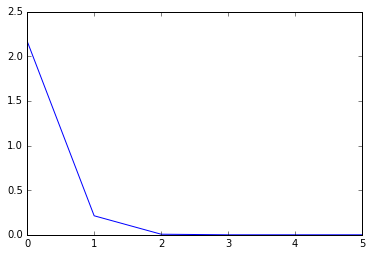

In [19]:
plt.plot([it['cost'] for it in summary['iterations'] ])

In [21]:
dlp = vsr.Dlp(vsr.Vec(1,1,1).unit(), 1)
p1 = vsr.Vec(1,0,1).null()
p2 = vsr.Vec(2,1,1).null()
dll = vsr.Dll(p1,p2).unit()

points = [point_mesh(pnt.spin(motor),color='lightpink') for motor in motors[2:3]]
lines = [line_mesh(dll.spin(motor),color='lightpink') for motor in motors[2:3]]
planes = [plane_mesh(dlp.spin(motor), width=1, height=1, color='lightpink') 
          for motor in motors[2:3]]


scene = Scene(children=[
        frame_mesh(),
        AmbientLight(color='#cccccc')] + points + lines + planes)

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
# renderer.width = '1024'
# renderer.height = '768'
display(renderer)

In [11]:
n_circles = 10
sigma = 0.09
points_a = [vsr.Vec(*np.random.normal(0.0, 0.3, 3)).null() 
            for i in range(n_circles)]
points_b = [point.spin(motor) for point in points_a]
points_b_noisy = [vsr.Vec(*(np.array(point)[:3] 
                            + sigma * np.random.randn(3))).null() 
                  for point in points_b]
radiuss = [np.random.rand() for i in range(n_circles)]
bivs = [vsr.Vec(*np.random.normal(0.0, 0.3, 3)).unit().unduale()
            for i in range(n_circles)]
circs_a = [vsr.Cir(p,r,b) for p,r,b in zip(points_a, radiuss, bivs)]
circs_b = [circle.spin(motor) for circle in circs_a]


In [12]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
# initial_motor = vsr.Vec(2,3,4).trs() * vsr.Rot(vsr.Biv(0,-1,0) * np.pi/6)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(circs_a, circs_b):
    mes.add_circle_difference_residual_block(a,b)
#     mes.add_circle_commutator_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary, motors) = mes.solve()
print(summary['full_report'])


Solver Summary (v 1.11.0-eigen-(3.2.92)-lapack-suitesparse-(4.4.6)-openmp)

                                     Original                  Reduced
Parameter blocks                            1                        1
Parameters                                  8                        8
Effective parameters                        6                        6
Residual blocks                            10                       10
Residual                                  100                      100

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver threads                       1                        1

Cost:
Initial                          3.292206e+01
Final              

In [13]:
circs_b[0].comm(circs_a[0])

TypeError: Unable to convert function return value to a Python type! The signature was
	(Cir, Cir) -> vsr::Multivector<vsr::algebra<vsr::metric<4, 1, true>, double>, vsr::Basis<(short)0, (short)3, (short)5, (short)6, (short)9, (short)10, (short)12, (short)17, (short)18, (short)20, (short)24, (short)15, (short)23, (short)27, (short)29, (short)30> >

In [23]:
scene = Scene(children=
              [circle_mesh(p,color='hotpink') for p in circs_a] +\
              [circle_mesh(p,color='lightskyblue') for p in circs_b] +\
#               [circle_mesh(p.spin(motors[2]),color='green') for p in circs_a] +\
              [circle_mesh(circs_b[0] - circs_a[0].spin(motors[4]),color='green') for p in circs_a] +\

              [frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
display(renderer)

In [27]:
circs_b[0] - circs_a[0].spin(motors[2])

Cir: [ 0.05316 -0.02884 -0.03763 -0.0005067 0.07717 0.008269 0.06473 0.05384 -0.03316 -0.05783 ]

## Motor Estimation from Points

### Dataset generation

In [ ]:
n_points = 10
sigma = 0.09
points_a = [vsr.Vec(*np.random.normal(0.0, 0.3, 3)).null() 
            for i in range(n_points)]
points_b = [point.spin(motor) for point in points_a]
points_b_noisy = [vsr.Vec(*(np.array(point)[:3] 
                            + sigma * np.random.randn(3))).null() 
                  for point in points_b]

In [ ]:
scene = Scene(children=
              [point_mesh(p,color='hotpink') for p in points_a] +\
              [point_mesh(p,color='lightskyblue') for p in points_b] +\
              [frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
display(renderer)

### Estimate motor using Exponential Formulation

In [ ]:
# initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
initial_motor = vsr.Vec(2,3,4).trs() * vsr.Rot(vsr.Biv(0,-1,0) * np.pi/6)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(points_a, points_b_noisy):
    mes.add_point_correspondences_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
(estimated_motor, summary_point_1, motors) = mes.solve()
print(summary_point_1['full_report'])

In [ ]:
plt.plot([it['cost'] for it in summary_point_1['iterations'] ])

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))

### Estimate motor using Valkenburg-Dorst solver

In [ ]:
vd = VDMotorEstimationSolver()
vd.add_point_observations(points_a, points_b)
vd_estimated_motor = vd.solve()

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(vd_estimated_motor))
print(np.allclose(np.array(motor), np.array(vd_estimated_motor)))

### Visualize Solution

In [ ]:
scene = Scene(children=
              [point_mesh(p,color='palegreen') for p in [p.spin(estimated_motor) for p in points_a]] +\
              [point_mesh(p,color='hotpink') for p in points_a] +\
              [point_mesh(p,color='hotpink') for p in points_b] +\
              [frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
# renderer.width = '1600'
# renderer.height = '900'
display(renderer)

## Motor Estimation from Lines

### Dataset generation

In [ ]:
lines_a = [vsr.Dll(vsr.Vec(*np.random.normal(0.0,0.8,3)),
                   vsr.Vec(*np.random.normal(0.0,0.8,3)))
          for i in range(10)]
lines_b = [line.spin(motor) for line in lines_a]
noise_motor = vsr.Vec(0.05,0.05,0.05).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/50.)
lines_b_noisy = [line.spin(motor * noise_motor) for line in lines_a]

In [ ]:
scene = Scene(children=
              [line_mesh(l.unit(),length=10, color='hotpink') for l in lines_a[:3]] +\
              [line_mesh(l.unit(), length=10, color='lightskyblue') for l in lines_b[:3]] +\
              [frame_mesh(),
               AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')

renderer.width = '1024'
renderer.height = '768'
display(renderer)

### Estimate motor using 6 residuals

$$ \min_{M \in \mathcal M} \frac{1}{2} \sum_{i=1}^n \| M \varLambda_{b_i} \tilde{M} - \varLambda_{a_i} \|^2 $$

In [ ]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b_noisy):
    mes.add_line_correspondences_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.parameter_tolerance = 1e-6
estimated_motor, lin_summary_1, motors = mes.solve()
print(lin_summary_1['brief_report'])

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))

### Valkenburg and Dorst Solver

In [ ]:
vd = VDMotorEstimationSolver()
vd.add_dual_line_observations(lines_a, lines_b)
vd_estimated_motor = vd.solve()
print(vd_estimated_motor)

In [ ]:
scene = Scene(children=
              [line_mesh(l,length=1, color='hotpink') for l in [l.spin(estimated_motor) for l in lines_a]] +\
              [line_mesh(l,length=1, color='lightgreen') for l in [l.spin(vd_estimated_motor) for l in lines_a]] +\
              [line_mesh(l, length=1, color='lightskyblue') for l in lines_b] +\
              [frame_mesh(),
               AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
renderer.width = '800'
renderer.height = '450'
display(renderer)

In [18]:
a = vsr.Vec(1,2,3)

In [19]:
vsr.Tnv(a)

TypeError: Incompatible function arguments. The following argument types are supported:
    1. (Tnv, Vec) -> None


### Estimate motor using 4 residuals

In [ ]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_angle_distance_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_2, motors = mes.solve()
print(lin_summary_2['full_report'])

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-03))

### Estimate motor using 2 residuals

In [ ]:
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(lines_a, lines_b):
    mes.add_line_angle_distance_norm_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
estimated_motor, lin_summary_3 = mes.solve()
print(lin_summary_3['full_report'])

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-03))

### Estimate motor using Valkenburg-Dorst solver

In [ ]:
vd = VDMotorEstimationSolver()
vd.add_dual_line_observations(lines_a, lines_b)
vd_estimated_motor = vd.solve()
print(vd_estimated_motor)

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(vd_estimated_motor))
print(np.allclose(motor, vd_estimated_motor))

### Plots

In [ ]:
fig, ax = plt.subplots(2, sharex=True)

ax[0].set_aspect('equal')
plt.set_cmap('gray')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax[0].spines[spine].set_visible(False)
    ax[1].spines[spine].set_visible(False)
    
ax[0].xaxis.set_ticks_position('none')
ax[0].yaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[1].yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax[0].spines[spine].set_linewidth(0.5)
    ax[0].spines[spine].set_color(almost_black)
    ax[1].spines[spine].set_linewidth(0.5)
    ax[1].spines[spine].set_color(almost_black)
ax[0].xaxis.label.set_color(almost_black)
ax[0].yaxis.label.set_color(almost_black)
ax[1].xaxis.label.set_color(almost_black)
ax[1].yaxis.label.set_color(almost_black)

# ax.plot([it['cost'] for it in lin_summary_4['iterations'] ], label=r"commutator")
# ax[0].plot([it['cost'] for it in lin_summary_3['iterations'] ], label=r"$2$-residuals", c='red')
ax[0].plot([it['cost'] for it in lin_summary_2['iterations'] ], label=r"$4$-residuals")
ax[1].plot([it['cost'] for it in lin_summary_1['iterations'] ], label=r"$6$-residuals")

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].grid(which="both")
ax[1].grid(which="both")

# ax[0].set_xscale('log')

# plt.yscale('log')

# ax[0].title.set_color(almost_black)
# ax[0].axhline(0, color=almost_black, linewidth=0.15)
# ax[0].axvline(0, color=almost_black, linewidth=0.15)
# ax[1].title.set_color(almost_black)
# ax[1].axhline(0, color=almost_black, linewidth=0.15)
# ax[1].axvline(0, color=almost_black, linewidth=0.15)

# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.
light_grey = np.array([float(248)/float(255)]*3)
legend = ax[0].legend(frameon=True, scatterpoints=1)
rect = legend.get_frame()
rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)
legend = ax[1].legend(frameon=True, scatterpoints=1)
rect = legend.get_frame()
rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)

fig.text(0.06, 0.5, 'Cost', ha='center', va='center', rotation='vertical')

# plt.tight_layout()
plt.xlabel(r'Iteration $k$')
# fig.ylabel(r'Cost')
# ax[1].ylabel(r'Cost')

# plt.savefig('/home/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_lines2.pdf')

## Motor Estimation from planes

### Dataset generation

In [ ]:
n_planes = 10
planes_a = []
for i in range(10):
    dir_vec = np.random.normal(0.0, 0.8, 4)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    distance = np.random.normal(0.0, 0.8,1)
    arr = dir_vec + distance
    planes_a.append(vsr.Dlp(dir_vec[0],dir_vec[1],dir_vec[2],distance[0]))
planes_b = [plane.spin(motor) for plane in planes_a]

In [ ]:
scene = Scene(children=
              [plane_mesh(p,width=1, height=1,color='hotpink') for p in planes_a[:3]] +\
              [plane_mesh(p,width=1, height=1,color='lightskyblue') for p in planes_b[:3]] +\
              [frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')

renderer.width = '1024'
renderer.height = '768'
display(renderer)

### Estimate motor using 2 residuals

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
noise_motor_plane = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/24)
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(planes_a, planes_b):
#     mes.add_dual_plane_angle_error_residual_block(a,b.spin(noise_motor_plane))
    mes.add_dual_plane_angle_error_residual_block(a,b)

mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = "DENSE_QR"
mes.function_tolerance = 1e-8
mes.max_num_iterations = 100
estimated_motor, pln_summary_1 = mes.solve()
print(pln_summary_1['brief_report'])

In [ ]:
print(np.array(motor))
print(np.array(estimated_motor))
print(np.allclose(np.array(motor), np.array(estimated_motor)))
print(np.allclose(np.array(motor), np.array(estimated_motor), 
                  rtol=1e-05, atol=1e-05))

In [ ]:
fig, ax = plt.subplots(1)

# ax.set_aspect('equal')
plt.set_cmap('gray')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)
ax.xaxis.label.set_color(almost_black)
ax.yaxis.label.set_color(almost_black)

ax.plot([it['cost'] for it in pln_summary_1['iterations'] ])

ax.title.set_color(almost_black)
ax.axhline(0, color=almost_black, linewidth=0.15)
ax.axvline(0, color=almost_black, linewidth=0.15)

# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.

# light_grey = np.array([float(248)/float(255)]*3)
# legend = ax.legend(frameon=True, scatterpoints=1)
# rect = legend.get_frame()
# rect.set_facecolor(light_grey)
# rect.set_linewidth(0.0)

plt.xlabel(r'Iteration $k$')
plt.ylabel(r'Cost')


# plt.savefig('/Users/lars/Dropbox/Apps/ShareLaTeX/2016-gacse/figures/cost_planes.pdf')

### Estimate motor using Valkenburg-Dorst solver

In [ ]:
vd = VDMotorEstimationSolver()
vd.add_dual_plane_observations(planes_a, planes_b)
vd_estimated_motor = vd.solve()
print(vd_estimated_motor)

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(vd_estimated_motor))
print(np.allclose(motor, vd_estimated_motor))

## Motor Estimation from heterogeneous conformal objects

### Estimate motor using Valkenburg-Dorst solver

In [ ]:
vd = VDMotorEstimationSolver()
vd.add_point_observations(points_a, points_b)
vd.add_dual_line_observations(lines_a, lines_b)
vd.add_dual_plane_observations(planes_a, planes_b)
vd_estimated_motor = vd.solve()
print(vd_estimated_motor)

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(vd_estimated_motor))
print(np.allclose(motor, vd_estimated_motor))

In [ ]:
initial_motors = [vd_estimated_motor]
vd_summaries_no_noise = []
estimated_motors = []
for initial_motor in initial_motors:
    mes = MotorEstimationSolver(initial_motor)
    for a, b in zip(planes_a, planes_b):
        mes.add_dual_plane_angle_error_residual_block(a,b)
    for a, b in zip(lines_a, lines_b):
        mes.add_line_correspondences_residual_block(a,b)
    for a, b in zip(points_a, points_b):
        mes.add_point_correspondences_residual_block(a,b)
    mes.set_parameterization('BIVECTOR_GENERATOR')
    mes.linear_solver_type = "DENSE_QR"
    mes.max_num_iterations = 100
    mes.function_tolerance = 1e-2
    em, summary_het = mes.solve()
    estimated_motors.append(em)
    vd_summaries_no_noise.append(summary_het)
    print(np.array(initial_motor))
    print(np.array(motor))
    print(np.array(em))
    print(summary_het['brief_report'])

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
noise_motor = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)

noise_motor_plane = vsr.Vec(0.05,0.05,0.05).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)
noise_motor_lines = vsr.Vec(-0.01,-0.01,-0.01).trs() * vsr.Rot(vsr.Biv(0,1,0) * (-np.pi/100))
noise_motor_points = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(0,0,1) * (np.pi/100))

# initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

initial_motors = [vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
                  vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(0,1,0) * (np.pi/6.0 + np.pi/2.))]

labels = ["1", "$\pi$"]
summaries_no_noise = []
estimated_motors_no_noise = []
for initial_motor in initial_motors:
    mes = MotorEstimationSolver(initial_motor)
    for a, b in zip(planes_a, planes_b):
        mes.add_dual_plane_angle_error_residual_block(a,b)
    for a, b in zip(lines_a, lines_b):
        mes.add_line_correspondences_residual_block(a,b)
    for a, b in zip(points_a, points_b):
        mes.add_point_correspondences_residual_block(a,b)
    mes.set_parameterization('BIVECTOR_GENERATOR')
    mes.linear_solver_type = "DENSE_QR"
    mes.max_num_iterations = 100
    em, summary_het = mes.solve()
    estimated_motors_no_noise.append(em)
    summaries_no_noise.append(summary_het)
    print(initial_motor)
#     print(motor)
    print(em)

#     print(np.array(motor))
#     print(np.array(estimated_motor))
#     print(np.allclose(np.array(motor), np.array(estimated_motor)))
#     print(np.allclose(np.array(motor), np.array(estimated_motor), 
#                       rtol=1e-05, atol=1e-5))
    print(summary_het['brief_report'])
    print()

In [ ]:
for s,l in zip(summaries_no_noise, labels):
    plt.plot([it['cost'] for it in s['iterations']], label=l)
plt.semilogy()
plt.legend()

## With noise

In [ ]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)

noise_motor_planes = vsr.Vec(0.05,0.05,0.05).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/100)
noise_motor_lines = vsr.Vec(-0.01,-0.01,-0.01).trs() * vsr.Rot(vsr.Biv(0,1,0) * (-np.pi/100))
noise_motor_points = vsr.Vec(0.1,0.1,0.1).trs() * vsr.Rot(vsr.Biv(0,0,1) * (np.pi/100))

points_b_noisy = [b.spin(noise_motor_points) for b in points_b]
lines_b_noisy = [b.spin(noise_motor_lines) for b in lines_b]
planes_b_noisy = [b.spin(noise_motor_planes) for b in planes_b]

### Estimate motor using Valkenburg-Dorst solver

In [ ]:
vd = VDMotorEstimationSolver()
vd.add_point_observations(points_a, points_b_noisy)
vd.add_dual_line_observations(lines_a, lines_b_noisy)
vd.add_dual_plane_observations(planes_a, planes_b_noisy)
vd_estimated_motor = vd.solve()
print(vd_estimated_motor)

#### Check solution

In [ ]:
print(np.array(motor))
print(np.array(vd_estimated_motor))
print(np.allclose(motor, vd_estimated_motor))

In [ ]:
d = [np.linalg.norm(np.array(a.spin(vd_estimated_motor)) - np.array(a.spin(motor))) for a in points_a]
print(np.mean(d), np.std(d))

In [ ]:
# initial_motors = [vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
#                   vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * (np.pi/6.0 + np.pi/2))]
summaries_noise = []
estimated_motors_noise = []
for initial_motor in initial_motors:
    mes = MotorEstimationSolver(initial_motor)
    for a, b in zip(planes_a, planes_b_noisy):
        mes.add_dual_plane_angle_error_residual_block(a,b)
    for a, b in zip(lines_a, lines_b_noisy):
        mes.add_line_correspondences_residual_block(a,b)
    for a, b in zip(points_a, points_b_noisy):
        mes.add_point_correspondences_residual_block(a,b)
    mes.set_parameterization('BIVECTOR_GENERATOR')
    mes.linear_solver_type = "DENSE_QR"
    mes.max_num_iterations = 100
#     mes.function_tolerance = 1e-4
    em, summary_het = mes.solve()
    estimated_motors_noise.append(em)
    summaries_noise.append(summary_het)
    print(np.array(initial_motor))
#     print(np.array(motor))
#     print(np.array(em))
    print(summary_het['brief_report'])

In [ ]:
d = [[np.linalg.norm(np.array(a.spin(em)) - 
                np.array(a.spin(motor))) for a in points_a] for em in estimated_motors_noise]
for d in d:
    print(np.mean(d), np.std(d))

In [ ]:
initial_motors = [vd_estimated_motor]
vd_summaries_noise = []
estimated_motors = []
for initial_motor in initial_motors:
    mes = MotorEstimationSolver(initial_motor)
    for a, b in zip(planes_a, planes_b_noisy):
        mes.add_dual_plane_angle_error_residual_block(a,b)
    for a, b in zip(lines_a, lines_b_noisy):
        mes.add_line_correspondences_residual_block(a,b)
    for a, b in zip(points_a, points_b_noisy):
        mes.add_point_correspondences_residual_block(a,b)
    mes.set_parameterization('BIVECTOR_GENERATOR')
    mes.linear_solver_type = "DENSE_QR"
    mes.max_num_iterations = 100
#     mes.function_tolerance = 1e-5
    em, summary_het = mes.solve()
    estimated_motors.append(em)
    vd_summaries_noise.append(summary_het)
    print(np.array(initial_motor))
    print(np.array(motor))
    print(np.array(em))
    print(summary_het['brief_report'])

In [ ]:
for s,l in zip(summaries_no_noise, labels):
    plt.plot([it['cost'] for it in s['iterations']], label=l)
for s,l in zip(summaries_noise, labels):
    plt.plot([it['cost'] for it in s['iterations']], label=l)
plt.axhline(y=vd_summaries_noise[0]['iterations'][0]['cost'])
plt.axhline(y=vd_summaries_no_noise[0]['iterations'][0]['cost'])
plt.semilogy()
plt.legend()

In [ ]:
for s in summaries:
    plt.plot([it['cost'] for it in s['iterations']])
plt.semilogy()

In [ ]:
d = [[np.linalg.norm(np.array(a.spin(em)) - 
                np.array(a.spin(motor))) for a in points_a] for em in estimated_motors]
for d in d:
    print(np.mean(d), np.std(d))

In [ ]:
fig, ax = plt.subplots(1)

ax.set_aspect('equal')

almost_black = '#262626'
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

spines_to_keep = ['bottom', 'left']
for spine in spines_to_keep:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color(almost_black)
ax.xaxis.label.set_color(almost_black)
ax.yaxis.label.set_color(almost_black)

# ax.grid(which="both")

ax.axhline(y=vd_summaries_noise[0]['iterations'][0]['cost'], 
           ls="-", lw=0.75,c='black',label="V\&D~[26], With noise")
ax.axhline(y=vd_summaries_no_noise[0]['iterations'][0]['cost'],
           ls="--", lw=0.75,c='black',label="V\&D~[26], Without noise")

ax.plot([it['cost'] for it in summaries_no_noise[1]['iterations']], label=r"Without noise, $\bar{\theta}_0 = \pi$")
ax.plot([it['cost'] for it in summaries_no_noise[0]['iterations']], label=r"Without noise, $\bar{\theta}_0 = {\pi \over 3}$")


ax.plot([it['cost'] for it in summaries_noise[1]['iterations']], label=r"With noise, $\bar{\theta}_0 = \pi$")
ax.plot([it['cost'] for it in summaries_noise[0]['iterations']], label=r"With noise, $\bar{\theta}_0 = {\pi \over 3}$")



ax.semilogy()

# ax.set_yscale('log')

ax.title.set_color(almost_black)
ax.axhline(0, color=almost_black, linewidth=0.15)
ax.axvline(0, color=almost_black, linewidth=0.15)

# Remove the line around the legend box, and instead fill it with a light grey
# Also only use one point for the scatterplot legend because the user will 
# get the idea after just one, they don't need three.

light_grey = np.array([float(248)/float(255)]*3)
legend = ax.legend(frameon=True, scatterpoints=1)
rect = legend.get_frame()
rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)




plt.xlabel(r'Iteration $k$')
plt.ylabel(r'Cost')


plt.savefig('/home/lars/Dropbox/PhD/latex/2016-05-18_-_AACA-D-16-00064_Manuscript_Tingelstad_Egeland/cost_heterogeneous2.pdf')